# __Midsemester Exam Answers__

In [10]:
import numpy as np
from Library_Midsem import *

## Question-1


In [35]:
def f(x): # Define the function for the solution
    return np.log(x/2) - np.sin(5*x/2)

def df(x): # Define the derivative of the function for newton Raphson
    return 1/(x) - (5/2)*np.cos(5*x/2)

a_q1 = 1.5
b_q1 = 2.5
accuracy_q1 = 1e-6


soln_newton,step_newton,solns_nr = newton_raphson_single(f,df, 2.25, accuracy_q1)

soln_regula,counts = regula_falsi_for_misdem( a_q1, b_q1,f, accuracy_q1)
solns_rf = regula_falsi_for_midsem_returns_list(a_q1, b_q1,f, accuracy_q1)



d=soln_regula
k=counts

y=soln_newton
n=step_newton

c=1
from prettytable import PrettyTable
t = PrettyTable(['Sl.No','Method', 'solution','No of iterations'])
t.add_row([c,'Newton Raphson', y,n])
t.add_row([c+1,'Regula falsi', d,k])
print('The solutions are :')
print(t)

p=PrettyTable()
p.field_names = ['Sl.No','Regula Falsi','Newton Raphson']
for i in range(0,len(solns_rf)):
    if i>=len(solns_nr):
        p.add_row([i+1,solns_rf[i],''])
    else:
        p.add_row([i+1,solns_rf[i],solns_nr[i]])


print("The comparison of the solutions with each step \n of iteration are shown in table below")

print(p)


print("We conclude that the Newton Raphson method is faster than the Regula Falsi method for the given function.")

The solutions are :
+-------+----------------+--------------------+------------------+
| Sl.No |     Method     |      solution      | No of iterations |
+-------+----------------+--------------------+------------------+
|   1   | Newton Raphson | 2.6231403354363083 |        4         |
|   2   |  Regula falsi  | 2.6231403379360847 |        8         |
+-------+----------------+--------------------+------------------+
The comparison of the solutions with each step 
 of iteration are shown in table below
+-------+--------------------+--------------------+
| Sl.No |    Regula Falsi    |   Newton Raphson   |
+-------+--------------------+--------------------+
|   1   | 11.801724402995978 | 2.7257440955762817 |
|   2   | 1.5312901593216757 | 2.615632295794126  |
|   3   |  4.74551021382713  | 2.6231199350454273 |
|   4   | 2.0409825962282375 | 2.623140335277078  |
|   5   | 2.6708027868190176 |                    |
|   6   | 2.6135620214211936 |                    |
|   7   | 2.62333987891

## Question-2




In [30]:
alpha = 0.01
Talpha = 40
L=10

def f1(ilist,x):
    return ilist[1]

def f2(ilist,x):
    return alpha*(ilist[0]-Talpha)

fnlist = [f1,f2] # list of functions

x0 = 0 #initial condition
T0 = 40

x1 = L #boundary condition
T1 = 200

xlist_qn2 , ylist_qn2= shooting_solve(fnlist,x0,T0,x1,T1,10,0.0001,0.01)

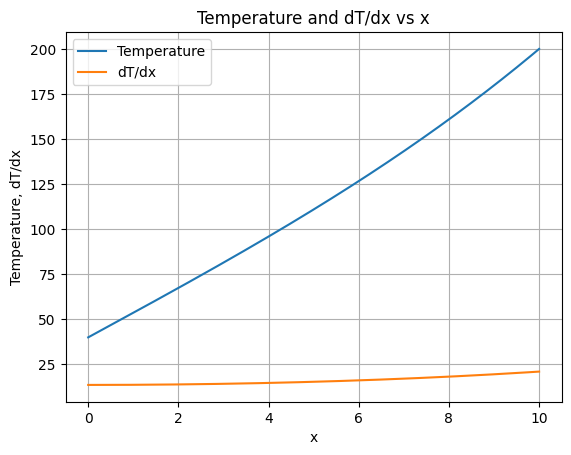

In [36]:
import matplotlib.pyplot as plt
plt.plot(xlist_qn2,ylist_qn2[0],label='Temperature')
plt.plot(xlist_qn2,ylist_qn2[1],label='dT/dx')
plt.xlabel('x')
plt.ylabel('Temperature, dT/dx')
plt.legend()
plt.title('Temperature and dT/dx vs x')
plt.grid()
plt.show()

In [44]:
for i in range(len(xlist_qn2)):
    if abs(100 - ylist_qn2[0][i]) < 1:
        print("The value of x at which the temperature is 100 is ", xlist_qn2[i],"m")
        break

The value of x at which the temperature is 100 is  4.209999999999955


## Question-3

The rod is heated at the center, so the initial heant distribution  (at t=0) is a delta function at the center of the rod at 300K. The rod is insulated at both ends, so the temperature at the ends of the rod is always 0K.



The value of alpha is:  0.4  which is less than 0.5


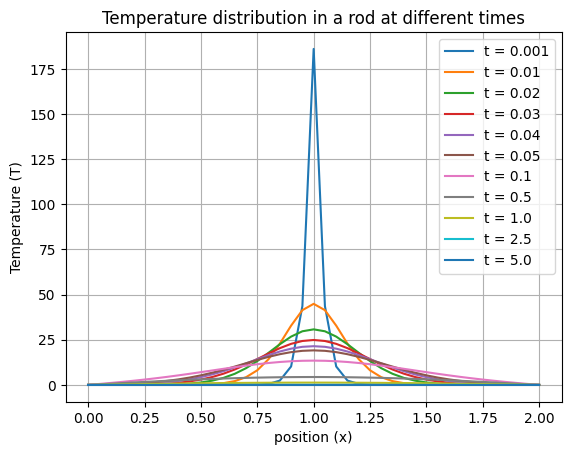

In [14]:
x_i_qn3 = 0   # Initial position of the end of the rod
x_f_qn3 = 2   # Final position of the end of the rod
nx_qn3 = 40   # Number of spatial grid points
t_i_qn3 = 0   # Initial time
t_f_qn3 = 10  # Final time
nt_qn3 = 10000 # Number of time grid points

hx = (x_f_qn3 - x_i_qn3)/nx_qn3 # Spatial step size
ht = (t_f_qn3 - t_i_qn3)/nt_qn3 # Time step size

alpha_qn3 = ht/(hx**2)

print("The value of alpha is: ", round(alpha_qn3,4)," which is less than 0.5" )

def g(x):
    if x==1:
        return 300
    else:
        return 0


def a(t):
    return 0

def b(t):
    return 0


import matplotlib.pyplot as plt
for i in [1,10,20,30,40,50,100,500,1000,2500,5000]:
    xlist_qn3, Tlist_qn3, tlist_qn3 = pde_explicit_solve(g,a,b,x_i_qn3,x_f_qn3,t_i_qn3,t_f_qn3,nx_qn3,nt_qn3,i)
    plt.plot(xlist_qn3,Tlist_qn3,label = "t = "+str(tlist_qn3[-1]))
    del xlist_qn3, Tlist_qn3, tlist_qn3

plt.legend()
plt.title("Temperature distribution in a rod at different times")
plt.xlabel("position (x)")
plt.ylabel("Temperature (T)")    
plt.grid()
plt.show()


## Question-4

we have the mass density as:
\begin{equation}
\lambda (x) = x^2
\end{equation}

so $dm = \lambda (x) dx = x^2 dx$

the center of mass is given by:
\begin{equation}
\bar{x} = \frac{\int x \lambda (x) dx}{\int \lambda (x) dx}
\end{equation}

and the integration limit is from 0 to 2, so:
\begin{equation}
COM = \bar{x} = \frac{\int_0^2 x x^2 dx}{\int_0^2 x^2 dx}
\end{equation}


In [15]:
def lambda_x(x):
    return x**2

def xlambda_x(x):
    return x*lambda_x(x)

a_q2 = 0
b_q2 = 2

I1_qn4 = simpsons(lambda_x, a_q2, b_q2, 1000)
I2_qn4 = simpsons(xlambda_x, a_q2, b_q2, 1000)

COM = I2_qn4/I1_qn4
print("The center of mass of the Rod is at: ", f'{COM:.4f}', "m")

The center of mass of the Rod is at:  1.5000 m


## Question-5

In [16]:
from prettytable import PrettyTable

file = open('C:\\Users\\apmna\\OneDrive\\Documents\\GitHub\\P452_Computational_Physics\\Midsem\\Q5-Input.txt')
lines = file.readlines()
lineindex = 1
while lineindex != len(lines):
    AB = []                                                                            #reading from file 
    while lines[lineindex][0] != '#':
        linelist = lines[lineindex].split(',')
        for i in range(len(linelist)):
            linelist[i]= float(linelist[i])
        lineindex += 1
        AB.append(linelist)
    lineindex += 1
    A = []
    while lines[lineindex][0] != '#':
        linelist = lines[lineindex].split(',')
        for i in range(len(linelist)):
            linelist[i]= float(linelist[i])
        lineindex += 1
        A.append(linelist)
    lineindex += 1
    B = []
    while lines[lineindex][0] != '#':
        linelist = lines[lineindex].split(',')
        for i in range(len(linelist)):
            linelist[i]= float(linelist[i])
        lineindex += 1
        B.append(linelist)
    lineindex += 1

Q5_ans = LU_Solve_eqn(A,B)

print("The solution from the LU decomposition is tabulated below:")

p = PrettyTable()
varlist=["a1","a2","a3","a4","a5","a6"]
p.field_names = ["Variable", "solution"]

for i in range(len(varlist)):
    p.add_row([varlist[i],round(Q5_ans[i][0],4)])

print(p)    

The solution from the LU decomposition is tabulated below:
+----------+----------+
| Variable | solution |
+----------+----------+
|    a1    | -1.7618  |
|    a2    |  0.8962  |
|    a3    |  4.0519  |
|    a4    | -1.6171  |
|    a5    |  2.0419  |
|    a6    |  0.1518  |
+----------+----------+
